In [1]:
pip install requests pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
API_KEY = "09f9927e8161b6acf10b66c6b8262f81"


In [5]:
print(data)


{'cod': 401, 'message': 'Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.'}


In [8]:
import requests
import pandas as pd

# Your API Key
API_KEY = "09f9927e8161b6acf10b66c6b8262f81"

# Cities list
cities = ["Chennai", "Delhi", "Mumbai", "Bangalore", "Hyderabad"]

weather_data = []

for city in cities:
    
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    
    response = requests.get(url)
    data = response.json()
    
    # Check if API call is successful
    if response.status_code == 200:
        
        weather_data.append({
            "City": city,
            "Temperature": data["main"]["temp"],
            "Humidity": data["main"]["humidity"],
            "Pressure": data["main"]["pressure"],
            "Weather": data["weather"][0]["main"]
        })
        
    else:
        print(f"Error fetching data for {city}: {data['message']}")

# Convert to DataFrame
df = pd.DataFrame(weather_data)

# Display data
df


,City,Temperature,Humidity,Pressure,Weather
0,Chennai,25.59,66,1015,Clouds
1,Delhi,19.05,45,1020,Haze
2,Mumbai,28.99,48,1012,Smoke
3,Bangalore,25.83,43,1014,Clouds
4,Hyderabad,25.23,50,1015,Haze


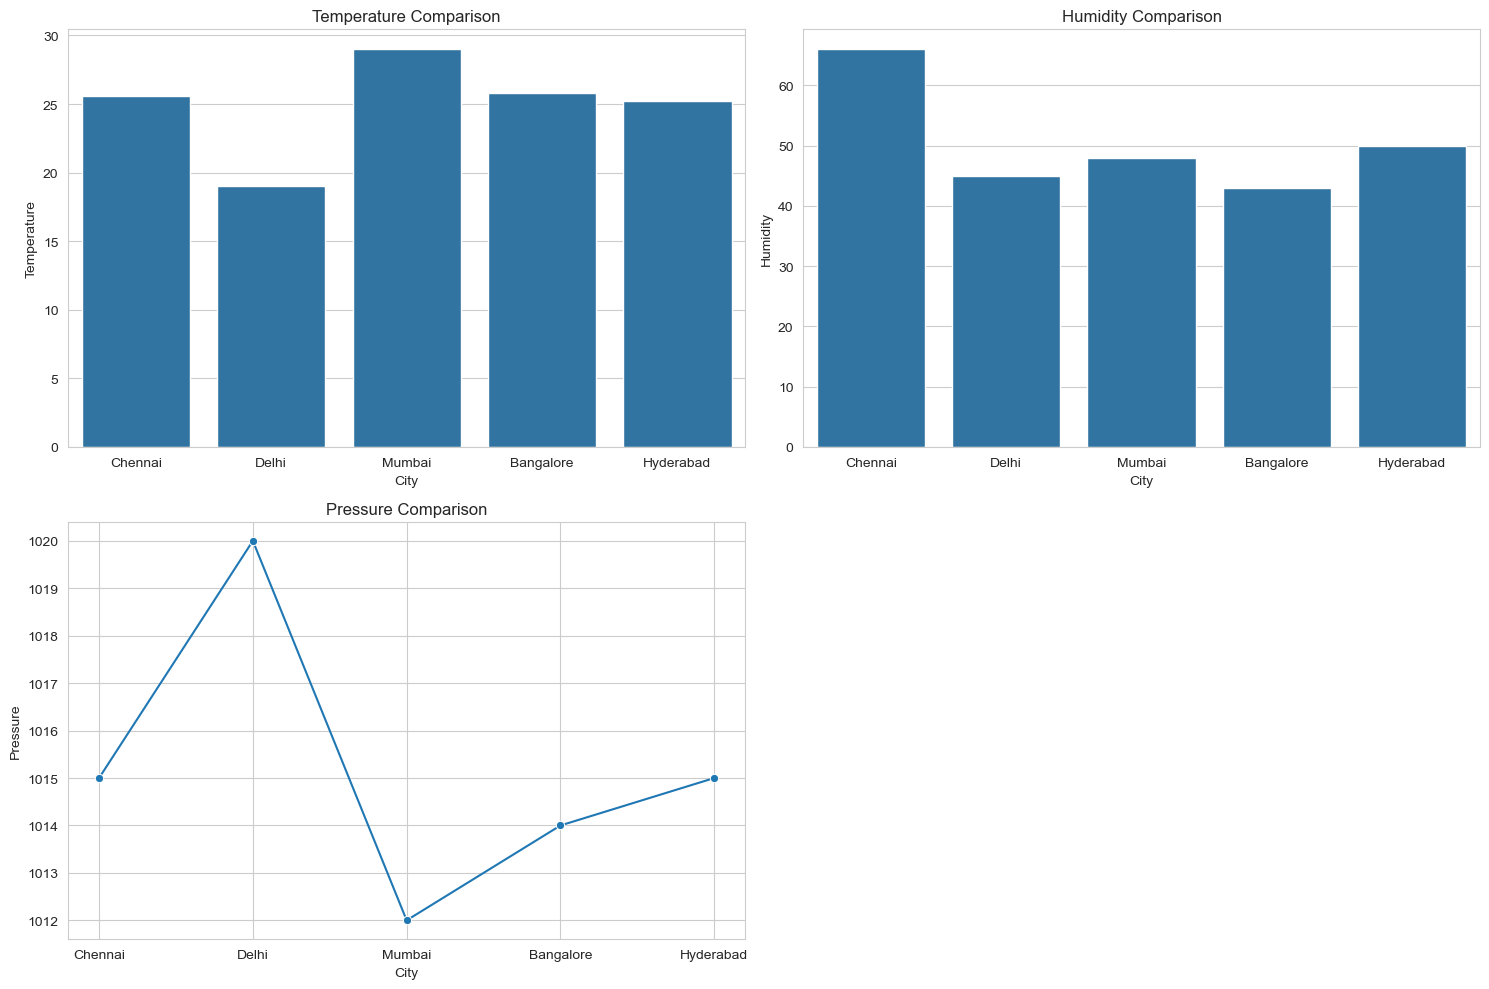

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(15,10))

# Temperature
plt.subplot(2,2,1)
sns.barplot(x="City", y="Temperature", data=df)
plt.title("Temperature Comparison")

# Humidity
plt.subplot(2,2,2)
sns.barplot(x="City", y="Humidity", data=df)
plt.title("Humidity Comparison")

# Pressure
plt.subplot(2,2,3)
sns.lineplot(x="City", y="Pressure", data=df, marker="o")
plt.title("Pressure Comparison")

plt.tight_layout()
plt.show()
